In [167]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Homework 1 - Alex Perez - Data Structures

### 1. Assume we implemented an algorithm that has complexity approximately $ nlog(n) $. How much faster is this implementation compared to one of complexity $ n^2 $?

We can start by dividing these two complexities:

\begin{equation}
\frac {n^2}{nlog(n)}
\end{equation}

\begin{equation}
\frac{n}{log(n)}
\end{equation}

Now, after a quick analysis, we can say that $n$ will grow faster than $log(n)$. If this short analysis is not convincing enough, lets assume otherwise:

\begin{equation}
\frac{n}{log(n)} < 1
\end{equation}

\begin{equation}
\Rightarrow n < log(n)
\end{equation}

It is useful to remember that, in class, we discussed that most of our logarithmic functions will have a base 2, so, using properties of logarithms, we can do as follows:

\begin{equation}
2^n < 2^{log(n)}
\end{equation}

\begin{equation}
\Rightarrow 2^n < n
\end{equation}

This last expression is obviously a contradiction, so, $n$ should be greater than $log(n)$ for all $n$ greater than 0 and, goin back to the original problem, the algorithm with complexity $nlog(n)$ is slower compared to the algorithm of complexity $n^2$. 

\begin{equation}
n^2 > n \cdot log(n)
\end{equation}

In [20]:
f = pd.DataFrame()
f['n'] = np.arange(1,100,10) #here I am using a data frame as seen in class

In [21]:
f['n^2'] = np.power(f['n'],2)
f['nlog(n)'] = f['n']* np.log2(f['n'])#Here I define the two functions that I want to compare

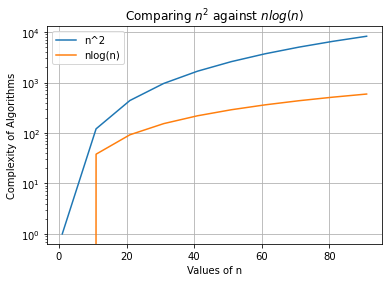

In [22]:
f.plot(x='n', logy=True)#Here I use the functions of plot to label the axis and the graph
plt.xlabel("Values of n")
plt.ylabel("Complexity of Algorithms")
plt.title('Comparing $n^2$ against $nlog(n)$')
plt.grid()

As proven. 

### 2. The runtime of an algorithm is captured in the following table. As precisely as possible, estimate the function that describes the growth of the runtime.

As seen in class, we can begin by creating a DataFrame with the values given in the table. We define n and the runtime of the algorithm:

In [23]:
n = [1000, 2000, 4000, 8000, 16000, 32000, 64000]
run_time = [0.0, 0.02, 0.2, 0.6, 2.6, 10.4, 41.6] #data given by the exercise

In [24]:
df = pd.DataFrame()
df['n'] = n
df['T(n)'] = run_time #as seen in class, I use a dataframe 

As a next step, we can plot these values in order to get a better idea of what we can expect the function will look like.

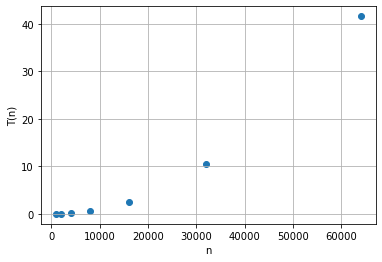

In [25]:
plt.scatter(n,run_time)
plt.xlabel("n")
plt.ylabel("T(n)")
plt.grid() #Scatter plot used to better see the features of the table we were given

### Hypothesis

The growth of the runtime seems to follow an exponential function of the type:

\begin{equation}
T(n) = e^n
\end{equation}

In [26]:
E = np.exp(n)

/var/folders/4k/1hk5lhhn44z5qbscz9vg1fsr0000gn/T/ipykernel_21551/754976390.py:1: RuntimeWarning: overflow encountered in exp
  E = np.exp(n)


By analyzing the input values of our function, this error makes sense since the exponential function is supposed to grow really fast. So, the first hypothesis is rejected. 

Giving it a second thought, and using **Matlab tools for curve fitting**, it can be stated that the function that describes the best the runtime of the algorithm can be of the form:

\begin{equation}
T(n) = a \cdot x^2 + b \cdot x + c
\end{equation}

where $a$, $b$ and $c$ are constants that should be obtained.

Using **Matlab** curve fitting tools, and aiming for a quadratic function, it was obtained as follows:

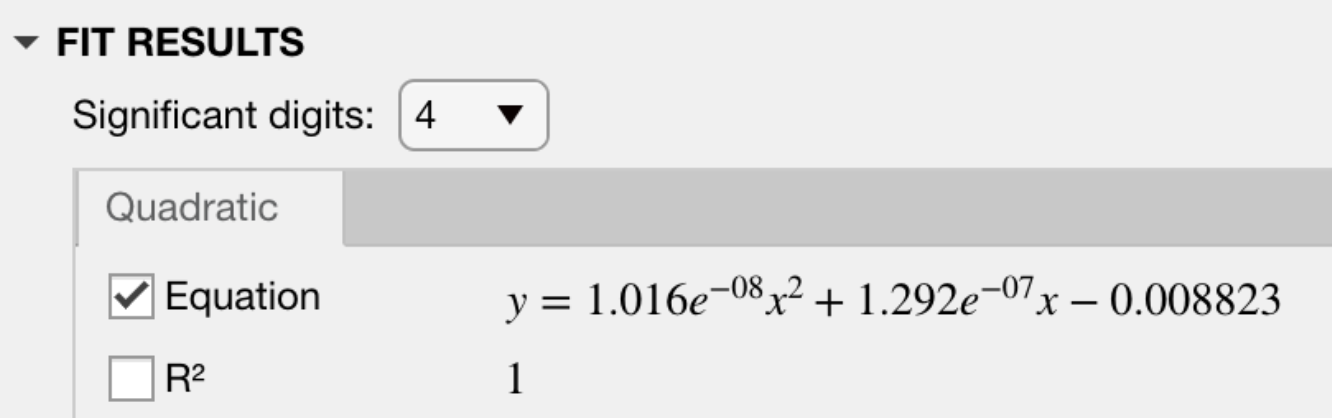

\begin{equation}
a = 1.016 \cdot 10^{-8}
\end{equation}
\begin{equation}
b = 1.292 \cdot 10^{-7}
\end{equation}
\begin{equation}
c = -0.008823
\end{equation}

With this in mind, a graph of the obtained quadratic function and the original runtime values of the algorithm can be obtained:

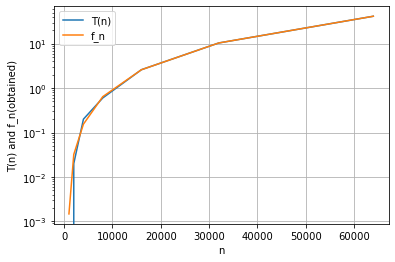

In [27]:
a = 1.016*10**-8 #The variables of the obtained function are defined
b = 1.292*10**-7
c = -0.008823
df['f_n'] = a*np.power(df['n'],2) + b*df['n'] + c #The function obtained is defined, usign the dataframe
df.plot(x='n', logy=True) #A graph is made in order to analyze and verify results
plt.xlabel("n")
plt.ylabel("T(n) and f_n(obtained)")
plt.grid()

Giving a final analysis, one can observe that for small values, $n \to 0$, the function obtained is not completely accurate but pretty close. Once $n$ starts to be bigger, they became the same function.

### 3. By estimating the number of operations as a function of n, estimate the complexity of the following function

```python
    
    def func1(n):
        A = range(0,n)
        sum = 0
        i = 0
        for x in A[i:]:
            i += 1
            for j in range(i, len(A)):
                y = A[j]
                k = j
                while k < len(A):
                    z = A[k]
                    k = 2*k
                    if x + y <= z:
                        sum += 1
        return sum
```

First, we start by analyzing everything except the loops in our function. **The notation from the book, and from the class, is used, reminding that $c_i$ is some constante and represents constant runtime:**

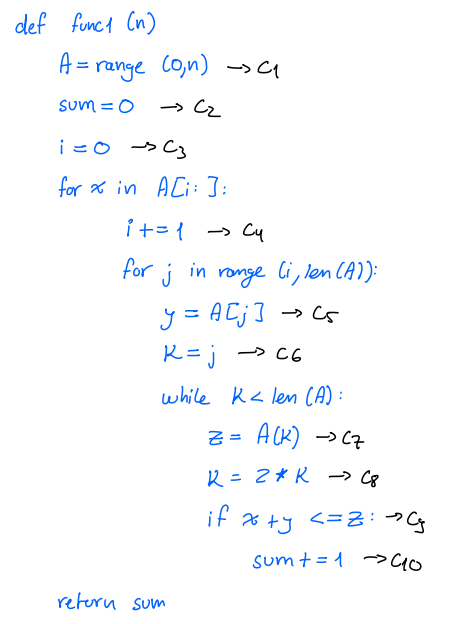

It must be noticed that in this function **we have a for loop, a nested for loop and a nested while**. Because of this, the complexity of our function will be a product of the complexities of each for and while. **Starting from the first for loop we have:**

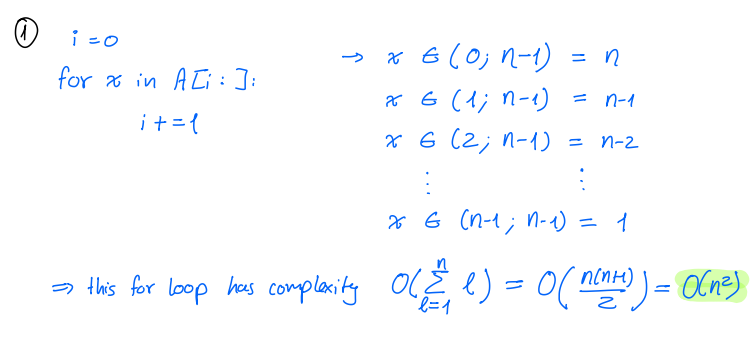

Next, we analyze **the nested for loop:**

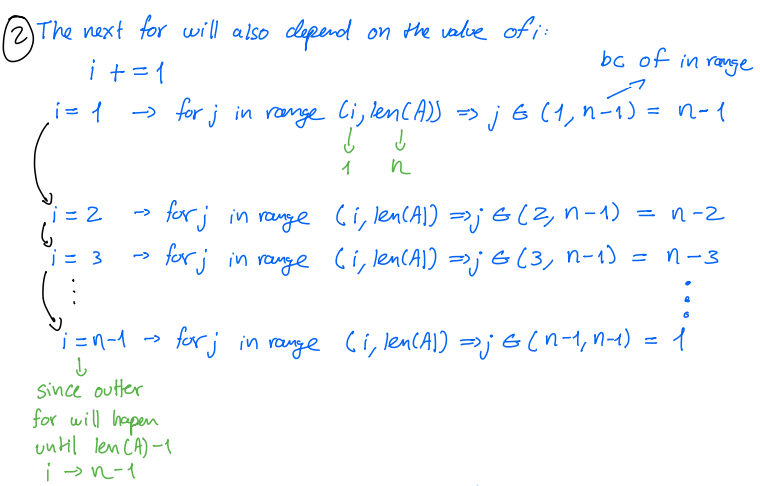

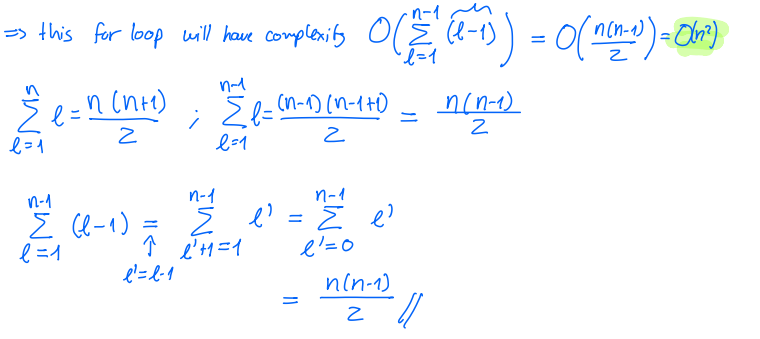

**Finally, the nested while will have complexity:**

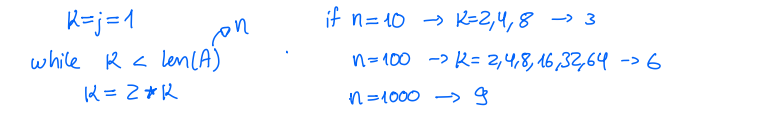

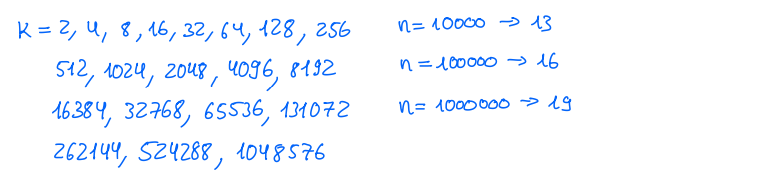

Using these results, and plotting them, we observe that:

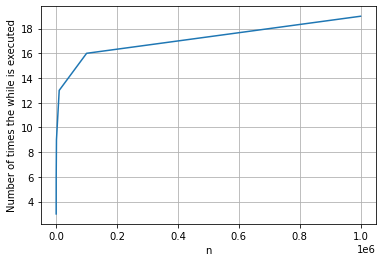

In [32]:
s = [10,100,1000,10000,100000,1000000]#value of n in the algorithm
r = [3,6,9,13,16,19]#number of times that k enters the nested while
plt.plot(s,r)
plt.xlabel("n")
plt.ylabel("Number of times the while is executed")
plt.grid()

As suggested and analyzed in class, one can observe that these plot, representing the number of times that **the nested while** will be executed in the algorithm, has a **complexity of $log(n)$**

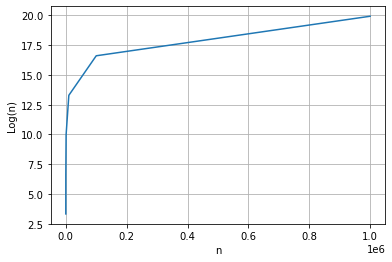

In [33]:
r = np.log2(s)
plt.plot(s,r)
plt.xlabel("n")
plt.ylabel("Log(n)")
plt.grid()

Once these has been predicted and proven, **the complexity of our whole function will be:**

\begin{equation}
O (n^2 \times n^2 \times Log(n) )
\end{equation}

\begin{equation}
\Rightarrow O (n^4 \cdot Log(n) )
\end{equation}


### 4. From class, remember the code we use to get the sum of the first $n$ positive integers:

```python
    
    def sum1(n):
        total = 0
        for i in range(1,n+1):
            total += i
        return total
```

### Now consider a different function that does the same thing:

```python
    
    def sum2(n):
        total = n*(n+1)/2
        return total
```

#### 1. Run the two functions and make sure that they return the same outputs. Use $n = 5,8,103,527$

First, as requested before the Homework was sent, python's decorators will be used in order to wrap the function time to the functions of these exercise:

In [50]:
def sum1(n):#first function of the exercise
    total = 0
    for i in range(1,n+1):
        total+=i
    return total

In [51]:
def sum2(n):#second function of the exercise, known as the Gauss formula
    total = (n*(n+1))/2
    return total

Now we can run these functions and make sure they return the same outputs:

In [52]:
n=[5,8,103,527]

print("Using the first function we get:")
for i in n:#Using the first function
    print("For n = ", i," we get ",sum1(i))
    
print("------------")
print("Using the second function we get:")
for i in n:#Using the second function
    print("For n = ", i," we get ",sum2(i))

Using the first function we get:
For n =  5  we get  15
For n =  8  we get  36
For n =  103  we get  5356
For n =  527  we get  139128
------------
Using the second function we get:
For n =  5  we get  15.0
For n =  8  we get  36.0
For n =  103  we get  5356.0
For n =  527  we get  139128.0


**They return the same outputs (ignoring the runtimes)**

#### 2. Use Python time library to estimate the runtime for inputs of $n = [1, 10, 10^2, 10^3, 10^4, 10^5, 10^6, 10^7, 10^8, 10^9]$

In [168]:
from time import time

def timer_func(func):
    def wrap_func(*args, **kwargs):
        t1 = time()*10**6
        result = func(*args, **kwargs)
        t2 = time()*10**6
        return result, t2-t1
    #here the result of my function and the time elapsed between its stard and end points will be returned
    return wrap_func #python decorators allow these to be used in other functions

In [19]:
@timer_func
def sum1(n):#first function of the exercise
    total = 0
    for i in range(1,n+1):
        total+=i
    return total

@timer_func
def sum2(n):#second function of the exercise, known as the Gauss formula
    total = (n*(n+1))/2
    return total

In [20]:
n=[1,10,10**2,10**3,10**4,10**5,10**6,10**7,10**8,10**9]

print("Using the first function we get:")
for i in n:#Using the first function
    print("For n = ", i," we get ",sum1(i))
    
print("------------")
print("Using the second function we get:")
for i in n:#Using the second function
    print("For n = ", i," we get ",sum2(i))

Using the first function we get:
For n =  1  we get  (1, 9.0)
For n =  10  we get  (55, 6.75)
For n =  100  we get  (5050, 28.25)
For n =  1000  we get  (500500, 282.75)
For n =  10000  we get  (50005000, 2192.0)
For n =  100000  we get  (5000050000, 16167.0)
For n =  1000000  we get  (500000500000, 66393.75)
For n =  10000000  we get  (50000005000000, 461299.0)
For n =  100000000  we get  (5000000050000000, 4648418.0)
For n =  1000000000  we get  (500000000500000000, 46672041.25)
------------
Using the second function we get:
For n =  1  we get  (1.0, 3.0)
For n =  10  we get  (55.0, 0.0)
For n =  100  we get  (5050.0, 1.0)
For n =  1000  we get  (500500.0, 2.0)
For n =  10000  we get  (50005000.0, 2.25)
For n =  100000  we get  (5000050000.0, 0.0)
For n =  1000000  we get  (500000500000.0, 1.0)
For n =  10000000  we get  (50000005000000.0, 0.0)
For n =  100000000  we get  (5000000050000000.0, 2.25)
For n =  1000000000  we get  (5.000000005e+17, 1.25)


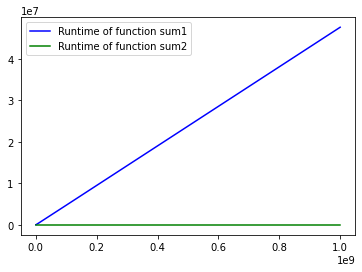

In [23]:
r_t1=[19,4,19.75,212.75,2183,15860,69987,472427.25,4745891.75,47618000.0]
r_t2=[2.0,1.25,1.25,0,1,0,0.75,2,2,1]
#plt.plot(n,np.log(r_t1), color ='b', label='Runtime of function sum1')
#plt.plot(n,np.log(r_t2), color ='g', label='Runtime of function sum2')
#trying to use a logarithmic anaylis was not possible since some values of the runtime of function sum2 are 0 (or too small to even be considered)
plt.plot(n,r_t1, color ='b', label='Runtime of function sum1')
plt.plot(n,r_t2, color ='g', label='Runtime of function sum2')
plt.legend()
plt.show()

#### 4. Analytically estimate the runtime functions for the functions ```sum1``` and ```sum2```. Call them $T_1(n)$ and $T_2(n)$.

As described in class, the growth of the runtime seems to follow a linear function of the type:

\begin{equation}
T_1(n) = a \times n + b
\end{equation}

Again, since we know the value of $T(n)$ as $n$ is $0$, we can say that:

\begin{equation}
b = 0
\end{equation}

For a, we can make use of our observations (just as in class):

\begin{equation}
1000 \times a = 521.75
\end{equation}

\begin{equation}
\Rightarrow a = 0.0052
\end{equation}

\begin{equation}
\Rightarrow T_1(n) = 0.052 \cdot n
\end{equation}


**On the other hand,** for $T_2(n)$ the analysis is pretty straight forward, observing our results about its runtime and the theory described during class, its runtime will be **constant**, even for large values of $n$, since all this function does is: read the value of $n$ (constant time) and write the value of ```total``` (also constant time). Even though $n$ can be a pretty large value, the writting and reading process will have a runtime of complexity $O(1)$ (constant time).

#### 5. How long will it take to run the code for $n = 10^{100}$ using ```sum1``` and ```sum2```? What are your main impressions about the difference?

**For the first function**, ```sum1```, it is clear that the small number/constant $0.052$ won't be of much importance for the case that $n = 10^{100}$. In this case, $T_1(n)$ will be:

\begin{equation}
T_1(n) \sim n
\end{equation}

So, ```sum1``` will take approximately $\sim 10^{100}$ seconds. This is an extremely huge amount of time, since our Universe is not even that old. 

**For the second function**, ```sum2```, we may have a problem, since its time complexity will be constant but its memory complexity will be $O(n)$. So, for this huge value of $n$, we will exceed the memory available in our device, leading to an error and a memory leak. 

In conclusion, for this extremely huge value of $n$, none of these functions will be appropiate to use. 

### 5. Prove that the running time of an algorithm is $\Theta(g(n))$ if and only if its worst-case running time is $O(g(n))$ and its best-case running time is $\Omega(g(n))$

Let $T(n)$ be the running time of the algorithm that we want to analyze.

If $T(n) = \Theta(g(n))$, then, for some $n \geq n_0$, 

\begin{equation*}
0 \leq T(n) \leq c_1 \cdot g(n)
\end{equation*}

We recognize this as the definition of $O(n) = c_1 \cdot g(n) $, i.e. $T(n)$ is upper bounded by $O(n)$. So, the worst-case running time of our algorithm is $O(n)$.

If $T(n) = \Theta(g(n))$, then, for some $n \geq n_0$, 

\begin{equation*}
0 \leq c_2 \cdot g(n) \leq T(n) 
\end{equation*}

We recognize this as the definition of $\Omega(n) = c_2 \cdot g(n) $, i.e. $T(n)$ is lower bounded by $\Omega(n)$. So, the best-case running time of our algorithm is $\Omega(n)$.

Finally, we get:

\begin{equation*}
0 \leq c_2 \cdot g(n) \leq T(n) \leq c_1 \cdot g(n)
\end{equation*}

\begin{equation*}
0 \leq \Omega (g(n)) \leq T(n) \leq O(g(n))
\end{equation*}

Which is our claim, and has been proven.

### 6. Sort the following functions in decreasing order of asymptotic complexity $(O(f(n)))$:

$$
f_1(n) = \sqrt{n}
$$

$$
f_2(n) = n^3
$$

$$
f_3(n) = \binom{n}{4}
$$

$$
f_4(n) = \sum_{i = 2}^{n}{(i-1)}
$$

In order to make things much easier, I would analyze functions $f_3$ and $f_4$ to obtain a much understandable order of its complexity. 

Starting with $f_3$ we have:

\begin{equation*}
f_3(n) = \binom{n}{4} = \frac{n!}{4! (n-4)!} = \frac{n(n-1)(n-2)(n-3)}{4 \cdot 3 \cdot 2}
\end{equation*}

By ignoring constants:

\begin{equation*}
f_3(n) = \binom{n}{4} = \frac{n!}{4! (n-4)!} \sim n(n-1)(n-2)(n-3)
\end{equation*}

\begin{equation*}
f_3(n) \sim (n^2 - n)(n-2)(n-3) = (n^2 - n)(n^2 -5n +6) = n^4 - 6n^3 + 11n^2 - 6n
\end{equation*}

\begin{equation}
f_3(n) \sim n^4
\end{equation}

Now, for $f_4$ we have:

\begin{equation*}
f_4(n) = \sum_{i = 2}^{n}{(i-1)}
\end{equation*}

Making $i-1 = i^,$:

\begin{equation*}
f_4(n) = \sum_{i^, = 1}^{n}{i^,}
\end{equation*}

Since $i^,$ its just a name, we can call it $i$:

\begin{equation*}
f_4(n) = \sum_{i = 1}^{n}{i}
\end{equation*}

Thus, we have obtained Gauss Sum once again. We already know that this has a runtime complexity of $O(n^2)$:

\begin{equation}
f_4(n) \sim n^2
\end{equation}

Finally, we have the order of complexity of our functions that we want to analyze:

$$
f_1(n) \sim O(\sqrt{n})
$$

$$
f_2(n) \sim O(n^3)
$$

$$
f_3(n) \sim O(n^4)
$$

$$
f_4(n) \sim O(n^2)
$$

Now, we can sort these functions in decreasing order of asymptotic complexity. For this, we can first plot them all:

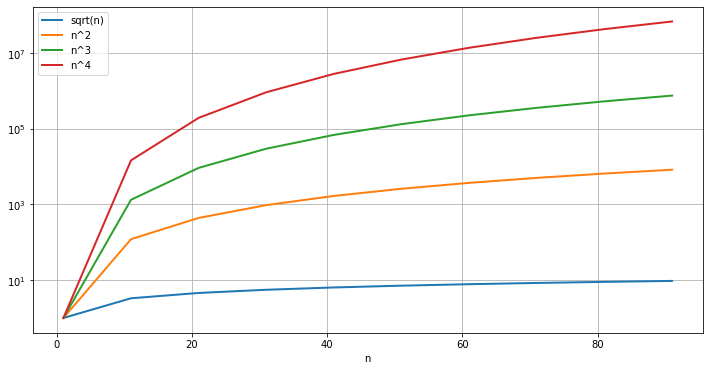

In [29]:
df = pd.DataFrame()
df['n2'] = np.arange(1,100,10)
df['sqrt(n)'] = np.sqrt(df['n2'])
df['n^2'] = np.power(df['n2'],2)
df['n^3'] = np.power(df['n2'],3)
df['n^4'] = np.power(df['n2'],4)
df.plot(x='n2',logy=True, lw=2, figsize=(12,6))
plt.xlabel('n')
plt.grid()

So, sorting these functions we will get:

\begin{equation}
f_3(n) > f_2(n) > f_4(n) > f_1(n)
\end{equation}

### 7. Implement the methods of the class ```Array``` that deal with deletion of elements. Consider the 3 cases we considered in class. 

I will start by reusing the code that we studied for the Array class:

In [175]:
import ctypes

class Array(object):
    """
    Implementation of the array data structure
    """

    def __init__(self, n):
        """
        Initialize the class
        """
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n)        
    
    def _create_array(self, n):
        """
        Creates a new array of capacity n
        """
        return (n * ctypes.py_object)()

In [176]:
class Array(Array):
    def __getitem__(self, item_index):
        """
        Return element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        try:
            x = self.array[item_index]
        except ValueError:
            x = None
        return x
    
    def __setitem__(self, item_index, item):
        """
        Set element at item_index
        """
        if (item_index < 0) or (item_index >= self.n):
            raise IndexError('index out of range!')
        self.array[item_index] = item

In [177]:
class Array(Array):
    
    def __init__(self, n, values=None):
        self.l = 0
        self.n = n
        self.array = self._create_array(self.n)
        if values:
            self.initialize_array(values)
            
    def initialize_array(self, values):
        """
        Initialize array
        """
        if self.n != len(values):
            raise ValueError("element count different than capacity")
        for item in values:
            self.array[self.l] = item
            self.l += 1
            
    def list_array(self):
        """
        List elements of the array
        using list comprehension
        """
        return ", ".join(str(x) if x is not None else '_' for x in self)

    def list_array2(self):    
        y = []    
        for x in self:
            if x is not None:
                y.append(str(x))
            else:
                y.append('_')
        return ", ".join(y)

No comments were added since this code is reused. From now on the methods and functions are original from these homework, so they will have comments. 

First, the case where we want to erase an item from the declared array given its index is implemented in function ```delete(index)```:

In [217]:
class Array(Array):
    def delete(self, index): #we only ask for the index of the array that the user wants to delete
        """
        Delete the element at the index specified
        """
        if (index < 0) or (index > self.l):
            raise IndexError('index out of range!')##the exception where the given index is out of range is handled
            
        x = index+1
        if x == (self.l):
            self.array[self.l-1]=None ##we consider the case where the index is the one of the last item of the array
        else:
            self.array[index] = self.array[x]
        
            for i in range(x,self.l):## after deleting the item, we move the items to the right of it to their left side
                if i==(self.l-1):
                    self.array[self.l-1]=None ##making sure that the last item of the rest of the array is empty
                else:
                    self.array[i]=self.array[i+1]

In [226]:
A = Array(7,[0,1,2,3,4,5,6])
print(A.list_array())

0, 1, 2, 3, 4, 5, 6


In [227]:
A.delete(3)
print(A.list_array())

0, 1, 2, 4, 5, 6, _


Thus, the function ```delete(index)``` its been tested and verified.

Next, we consider the case where we want to delete the head of the array, its first item. For this, the function ```delete_head()``` is implemented:

In [220]:
class Array(Array):
    def delete_head(self):
        """
        Delete the element at the head 
        """
        for i in range(0,self.l-1):#making sure that the rest of the items are moved to their left side
            self.array[i]=self.array[i+1]
        self.array[self.l-1] = None#making sure that the last item of the array is empty now

In [228]:
A = Array(7,[1,1,2,3,4,5,6])
print(A.list_array())

1, 1, 2, 3, 4, 5, 6


In [229]:
A.delete_head()
print(A.list_array())

1, 2, 3, 4, 5, 6, _


Thus, the function ```delete_head()``` its been tested and verified.

Finally, we consider the case where we want to delete the tail of the array, its last item. For this, the function ```delete_tail()``` is implemented:

In [223]:
class Array(Array):
    def delete_tail(self):
        """
        Delete the element at the tail
        """
        
        self.array[self.l-1] = None#its implementation its pretty straight forward

In [230]:
A = Array(7,[0,1,2,3,4,5,10])
print(A.list_array())

0, 1, 2, 3, 4, 5, 10


In [231]:
A.delete_tail()
print(A.list_array())

0, 1, 2, 3, 4, 5, _


Thus, the function ```delete_tail()``` its been tested and verified.